


 two dogs play with each other on the grass 


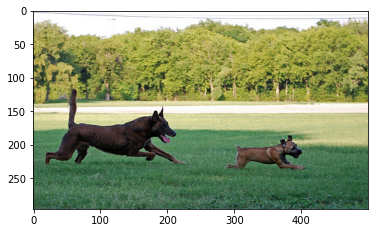

In [1]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.applications.xception import Xception
from keras.models import load_model
from pickle import load
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import argparse



def extract_features(filename, model):
        try:
            image = Image.open(filename)
            
        except:
            print("ERROR: Couldn't open image! Make sure the image path and extension is correct")
        image = image.resize((299,299))
        image = np.array(image)
        # for images that has 4 channels, we convert them into 3 channels
        if image.shape[2] == 4: 
            image = image[..., :3]
        image = np.expand_dims(image, axis=0)
        image = image/127.5
        image = image - 1.0
        feature = model.predict(image)
        return feature

def word_for_id(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None


def generate_desc(model, tokenizer, photo, max_length):
    in_text = 'start'
    for i in range(max_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], maxlen=max_length)
        pred = model.predict([photo,sequence], verbose=0)
        pred = np.argmax(pred)
        word = word_for_id(pred, tokenizer)
        if word is None:
            break
        in_text += ' ' + word
        if word == 'end':
            break
    return in_text


img_path = 'Flicker8k_Dataset/2723477522_d89f5ac62b.jpg'
#img_path = 'Flicker8k_Dataset/3072172967_630e9c69d0.jpg'

max_length = 32
tokenizer = load(open("tokenizer.p","rb"))
model = load_model('models/model_9.h5')
xception_model = Xception(include_top=False, pooling="avg")

photo = extract_features(img_path, xception_model)
img = Image.open(img_path)

description = generate_desc(model, tokenizer, photo, max_length)
description = description.strip('start').strip('end')
print("\n\n")
print(description)
plt.imshow(img)




In [ ]:
3385593926_d3e9c21170.jpg
2677656448_6b7e7702af.jpg
311146855_0b65fdb169.jpg
1258913059_07c613f7ff.jpg
241347760_d44c8d3a01.jpg
2654514044_a70a6e2c21.jpg
2339106348_2df90aa6a9.jpg
256085101_2c2617c5d0.jpg
280706862_14c30d734a.jpg
3072172967_630e9c69d0.jpg
3482062809_3b694322c4.jpg
1167669558_87a8a467d6.jpg
2847615962_c330bded6e.jpg
3344233740_c010378da7.jpg
2435685480_a79d42e564.jpg
3110649716_c17e14670e.jpg
2511019188_ca71775f2d.jpg
2521770311_3086ca90de.jpg
2723477522_d89f5ac62b.jpg
2218609886_892dcd6915.jpg
3745451546_fc8ec70cbd.jpg
2844018783_524b08e5aa.jpg